<a href="https://colab.research.google.com/github/ahmet-kemal-ates/data-driven-ESS-model/blob/main/test_setup_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow numpy matplotlib

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
# Parameters for ECM model
R0 = 0.01  # Internal resistance (Ohms)
C1 = 2000  # Capacitance for dynamic response (Farads)
R1 = 0.015 # Resistance for dynamic response (Ohms)

# Simple function to simulate ECM model output (voltage) based on input current
def ecm_model(current, soc, time_step):
    """ECM model to calculate the output voltage based on input current."""
    voltage_dynamic = soc / (C1 * R1)
    voltage_instantaneous = current * R0
    output_voltage = soc + voltage_dynamic + voltage_instantaneous
    return output_voltage

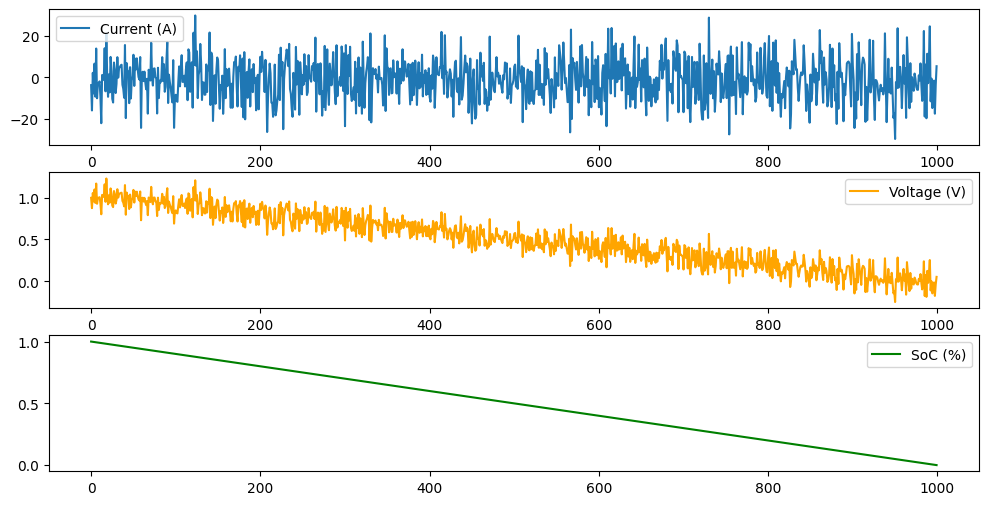

In [ ]:
# Generate synthetic data
time_steps = 1000
current = np.random.randn(time_steps) * 10  # Current in Amps
soc = np.linspace(1, 0, time_steps)  # State of Charge from 100% to 0%
temperature = np.random.normal(25, 5, time_steps)  # Temperature in Celsius
voltage = np.array([ecm_model(i, s, t) for i, s, t in zip(current, soc, range(time_steps))])

# Plot the synthetic data
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(current, label="Current (A)")
plt.legend()
plt.subplot(3, 1, 2)
plt.plot(voltage, label="Voltage (V)", color='orange')
plt.legend()
plt.subplot(3, 1, 3)
plt.plot(soc, label="SoC (%)", color='green')
plt.legend()
plt.show()


In [ ]:
# Neural network to predict voltage based on current, SoC, and temperature
model = Sequential([
    Dense(64, input_shape=(3,), activation='relu'),  # Input: current, SoC, temperature
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Output: predicted voltage
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Prepare the training data (stack current, SoC, temperature as input features)
X = np.column_stack((current, soc, temperature))
y = voltage  # The target output is the actual measured voltage

# Train the model
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 5.0725 - val_loss: 0.0293
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1759 - val_loss: 0.2393
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0685 - val_loss: 0.2957
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0670 - val_loss: 0.2320
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0625 - val_loss: 0.2061
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0574 - val_loss: 0.2277
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0567 - val_loss: 0.2331
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0559 - val_loss: 0.1777
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0491 - val_loss: 0.1384
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0487 - val_loss: 0.1762
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0417 - val_loss: 0.1455
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0384 - val_lo

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


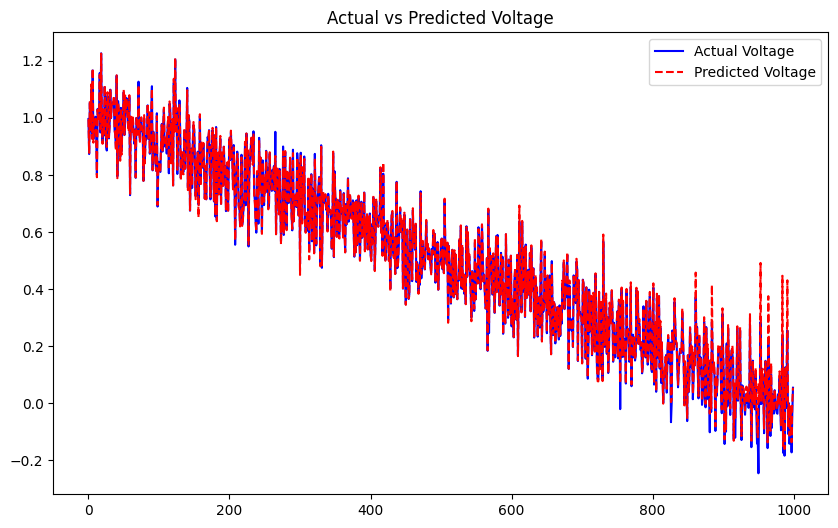

In [ ]:
# Predict the voltage using the trained model
predicted_voltage = model.predict(X)

# Plot actual vs predicted voltage
plt.figure(figsize=(10, 6))
plt.plot(voltage, label='Actual Voltage', color='blue')
plt.plot(predicted_voltage, label='Predicted Voltage', color='red', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Voltage')
plt.show()
